In [22]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
sns.set_style('whitegrid')
sns.set_palette("Set1")

# Load Dataset

In [23]:
raw_data = pd.read_csv("../data/loans.csv", sep=",")
pd.set_option('display.max_columns', None)

/Users/carlovoss/jupyter_notebooks/ginkgo_analytics/lib_loan/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# General Data Statistics

In [24]:
raw_data.shape

(421097, 137)

In [25]:
raw_data.head(-1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount
0,NaN,NaN,20000.0,20000.0,20000.0,36 months,6.49%,612.89,A,A2,"TEAM LEAD, QUALITY ENGINEER",6 years,MORTGAGE,55000.0,Not Verified,Dec-2015,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,381xx,TN,29.15,0.0,Sep-1994,0.0,74.0,NaN,9.0,0.0,4851.0,23.8%,23.0,w,9369.66,9369.66,12239.770000,12239.77,10630.34,1609.43,0.0,0.00,0.0000,Sep-2017,612.89,Oct-2017,Sep-2017,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,205155.0,1.0,3.0,1.0,4.0,3.0,36812.0,79.0,1.0,1.0,2776.0,62.0,20400.0,1.0,0.0,3.0,5.0,25644.0,9924.0,21.9,0.0,0.0,87.0,255.0,8.0,3.0,1.0,8.0,NaN,3.0,NaN,0.0,1.0,3.0,2.0,9.0,8.0,5.0,14.0,3.0,9.0,0.0,0.0,0.0,2.0,95.7,0.0,0.0,0.0,247433.0,41663.0,12700.0,46367.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,10000.0,10000.0,10000.0,36 months,11.48%,329.67,B,B5,Paralegal,2 years,RENT,33000.0,Not Verified,Dec-2015,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,477xx,IN,21.75,0.0,Aug-2009,0.0,NaN,12.0,12.0,1.0,8052.0,35.6%,20.0,w,4586.07,4586.07,6888.440000,6888.44,5413.93,1474.51,0.0,0.00,0.0000,Sep-2017,329.67,Oct-2017,Sep-2017,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,23197.0,1.0,4.0,0.0,0.0,28.0,15145.0,56.0,2.0,6.0,2715.0,47.0,22600.0,0.0,0.0,1.0,6.0,1933.0,12925.0,37.9,0.0,0.0,52.0,76.0,5.0,5.0,0.0,5.0,NaN,2.0,NaN,0.0,6.0,7.0,6.0,10.0,4.0,8.0,16.0,7.0,12.0,0.0,0.0,0.0,2.0,100.0,33.3,0.0,1.0,49732.0,23197.0,20800.0,27132.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,21000.0,21000.0,21000.0,60 months,13.99%,488.53,C,C4,Resident physician,< 1 year,RENT,52000.0,Source Verified,Dec-2015,Current,n,NaN,NaN,credit_card,Credit card refinancing,441xx,OH,14.47,0.0,Jan-2005,1.0,NaN,NaN,5.0,0.0,20374.0,87.4%,15.0,w,15546.37,15546.37,9852.210000,9852.21,5453.63,4398.58,0.0,0.00,0.0000,Sep-2017

In [26]:
raw_data.drop(raw_data.tail(1).index,inplace=True)

## Type Conversion

In [27]:
# Intest Rate 
raw_data['int_rate'] = raw_data['int_rate'].str.rstrip('%').astype('float') / 100.0

## Missing values statistics

In [28]:
mis_val = 100 * raw_data.isnull().sum() / len(raw_data)
mis_val_df = mis_val.sort_values(ascending=False).round(1)
mis_val_df.head(25)

revol_bal_joint                               100.0
sec_app_revol_util                            100.0
sec_app_num_rev_accts                         100.0
sec_app_chargeoff_within_12_mths              100.0
sec_app_collections_12_mths_ex_med            100.0
sec_app_mths_since_last_major_derog           100.0
sec_app_open_acc                              100.0
sec_app_mort_acc                              100.0
sec_app_inq_last_6mths                        100.0
sec_app_earliest_cr_line                      100.0
sec_app_open_il_6m                            100.0
url                                           100.0
member_id                                     100.0
id                                            100.0
desc                                          100.0
dti_joint                                      99.9
verification_status_joint                      99.9
annual_inc_joint                               99.9
orig_projected_additional_accrued_interest     99.7
hardship_pay

## Data types

Text(0, 0.5, 'Data type')

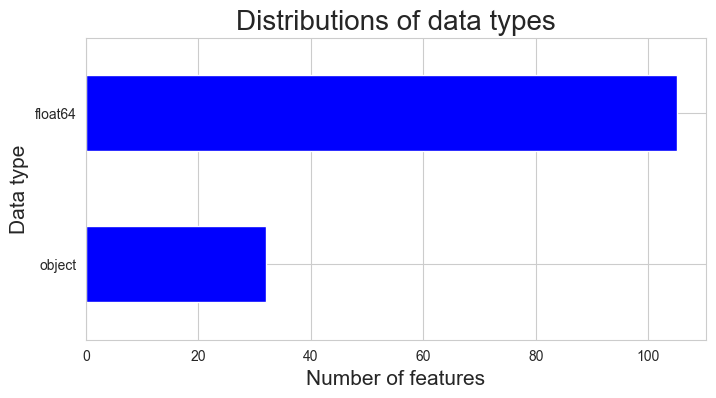

In [29]:
plt.figure(figsize=(8,4), dpi=100)
raw_data.dtypes.value_counts().sort_values().plot(kind='barh', color='b')
plt.title('Distributions of data types',fontsize=20)
plt.xlabel('Number of features',fontsize=15)
plt.ylabel('Data type',fontsize=15)

In [30]:
categorical_features = raw_data.select_dtypes('object').apply(pd.Series.nunique, axis = 0).sort_values(ascending=False)
print(categorical_features)
droped_cat_feature = categorical_features.loc[categorical_features > 30].index.values

emp_title                    120812
revol_util                     1211
zip_code                        914
earliest_cr_line                668
addr_state                       49
sub_grade                        35
desc                             34
last_credit_pull_d               34
last_pymnt_d                     33
title                            27
purpose                          14
issue_d                          12
emp_length                       11
hardship_reason                   9
payment_plan_start_date           9
hardship_end_date                 9
hardship_start_date               8
loan_status                       7
grade                             7
home_ownership                    4
hardship_loan_status              4
next_pymnt_d                      4
verification_status               3
hardship_status                   3
pymnt_plan                        2
initial_list_status               2
application_type                  2
hardship_flag               

# Data Cleaning

## Missing Values

Ich entferne alle Spalten mit mehr als 40% fehlenden Daten. Sie werden für die Modellierung und Exploration nicht benötigt.

In [35]:
reduced_dataset = raw_data.copy()
temp = [i for i in reduced_dataset.count() < 421097 * 0.6]
reduced_dataset.drop(reduced_dataset.columns[temp], axis=1, inplace=True)
reduced_dataset.shape

(421096, 85)

## Categorical columns with too many unique values

In [36]:
categorical_features = reduced_dataset.select_dtypes('object').apply(pd.Series.nunique, axis = 0).sort_values(ascending=False)
droped_cat_feature = categorical_features.loc[categorical_features > 30].index.values
reduced_dataset.drop(droped_cat_feature, axis=1, inplace=True)
reduced_dataset.shape

(421096, 77)

## Check for Constant Values in Numeric Columns 

In [37]:
num_features = reduced_dataset.select_dtypes('float64').columns.values
reduced_dataset[num_features].nunique().sort_values()

policy_code              1
num_tl_120dpd_2m         5
num_tl_30dpd             5
inq_last_6mths           7
acc_now_delinq           8
                     ...  
tot_cur_bal         230329
tot_hi_cred_lim     237207
total_rec_int       253451
total_pymnt_inv     319682
total_pymnt         323143
Length: 64, dtype: int64

In [38]:
reduced_dataset.drop("policy_code", axis=1, inplace=True)

## Save reduced dataset

In [41]:
reduced_dataset.to_csv("../data/reduced_dataset.csv", sep=",", index=False)

# Data Exploration

## Loan Status

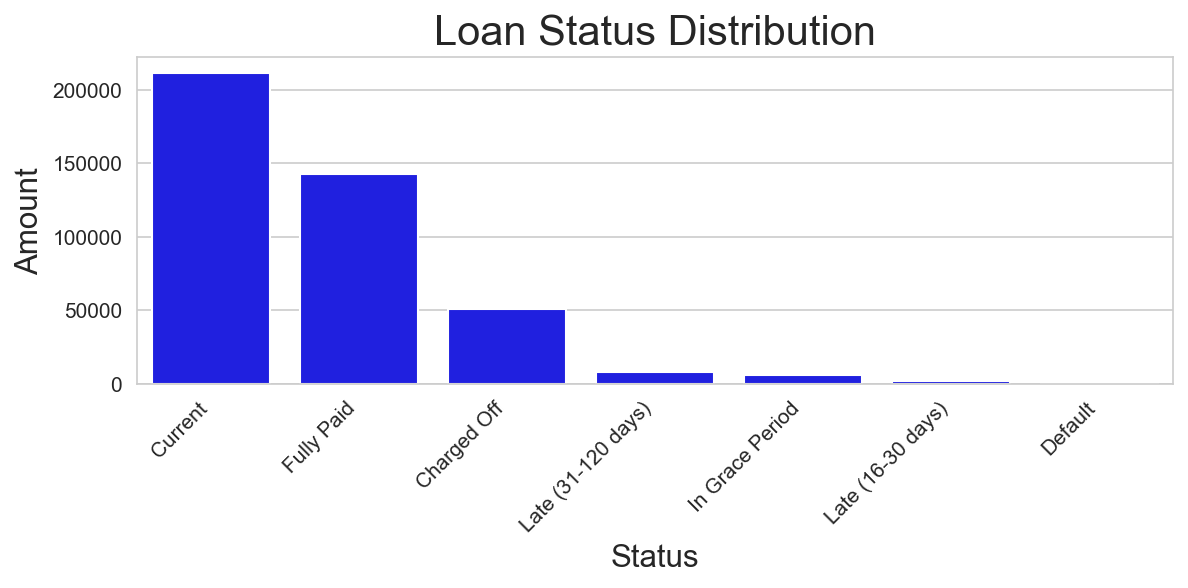

In [14]:
plt.figure(figsize=(8,4), dpi=150)
f=sns.countplot(x="loan_status", data=reduced_dataset ,order = reduced_dataset['loan_status'].value_counts().index ,color='b')
f.set_xticklabels(f.get_xticklabels(),fontdict={'horizontalalignment':'right'},rotation=45)
f.set_xlabel("Status", fontsize=15)
f.set_ylabel("Amount", fontsize=15)
f.set_title("Loan Status Distribution", fontsize=20)
plt.tight_layout(pad=1)
plt.savefig("./graphics/loan_status.png")
plt.show()

__Analyse__:

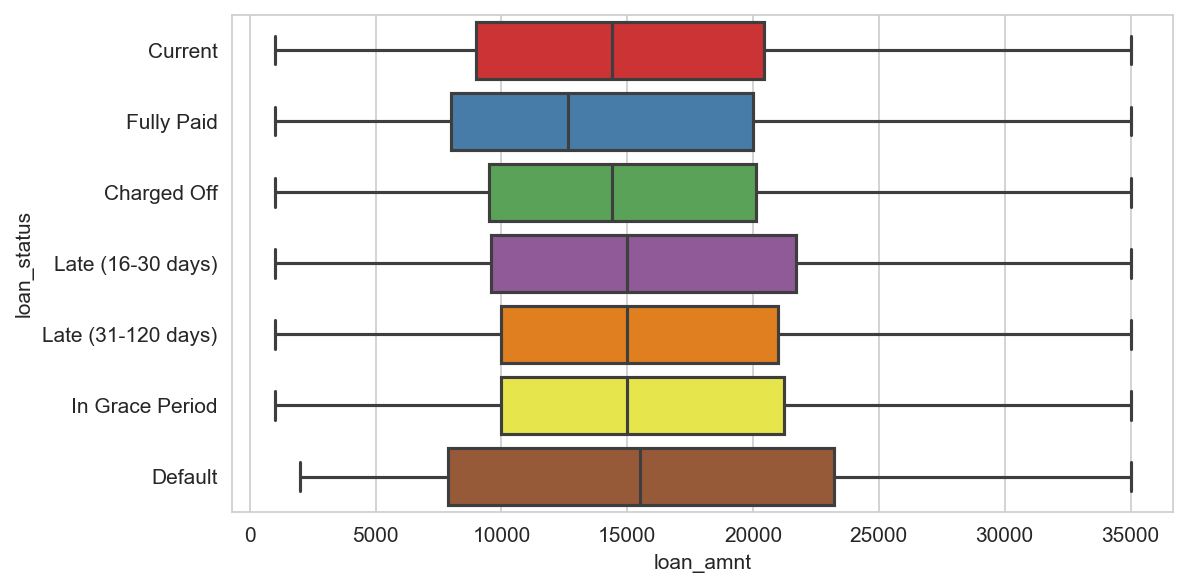

In [15]:
plt.figure(figsize=(8,4), dpi=150)
sns.boxplot(x="loan_amnt", y="loan_status", data=reduced_dataset)
plt.tight_layout(pad=1)
plt.savefig("./graphics/loan_amnt_per_status.png")

__Analyse__:
- Vollständig bezahlte Kredite sind in der Regel kleiner. Dies könnte auf das Alter der Darlehen zurückzuführen sein.
- Die Ausfälle haben unter den anderen Darlehensstatus die höchste Anzahl.

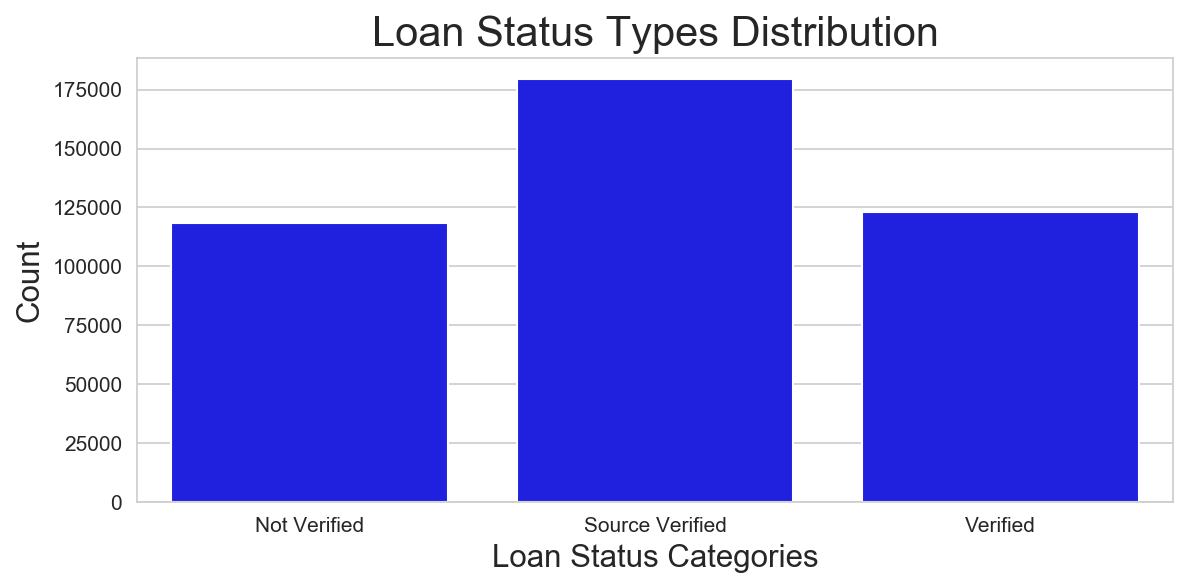

In [46]:
plt.figure(figsize=(8,4), dpi=150)
g = sns.countplot(x="verification_status", data=reduced_dataset, color='blue')
g.set_xlabel("Loan Status Categories", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=20)
plt.tight_layout(pad=1)
plt.savefig("./graphics/verification_status.png")
plt.show()

## Purpose 

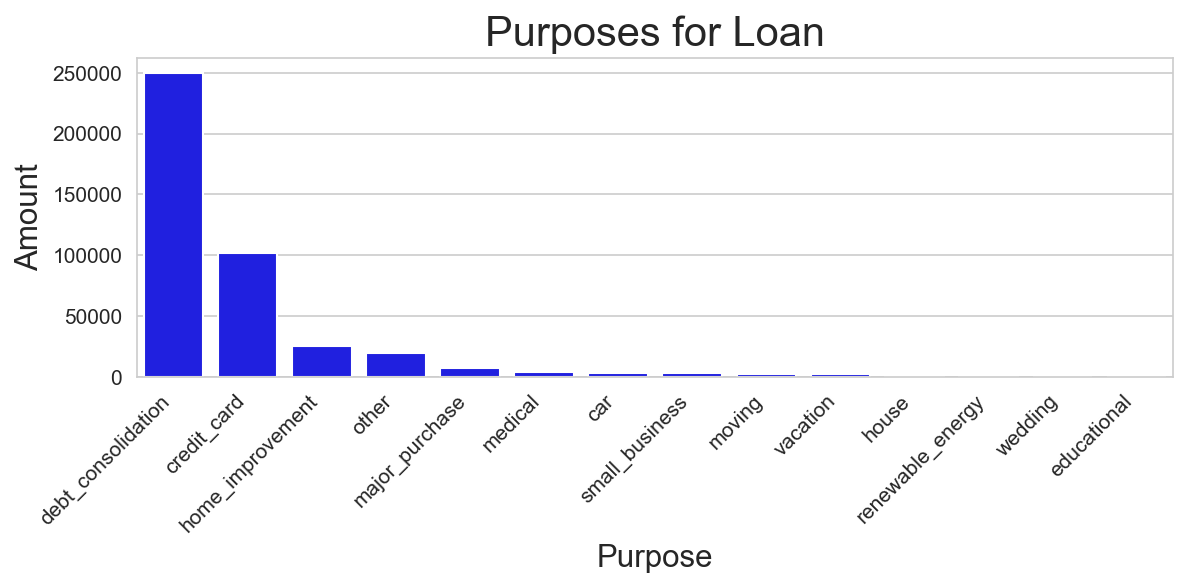

In [16]:
plt.figure(figsize=(8,4), dpi=150)
f = sns.countplot(x='purpose', data=reduced_dataset, order = reduced_dataset['purpose'].value_counts().index,color='b')
f.set_title("Purposes for Loan", fontsize=20)
f.set_xticklabels(f.get_xticklabels(),fontdict={'horizontalalignment':'right'},rotation=45)
f.set_xlabel("Purpose", fontsize=15)
f.set_ylabel('Amount', fontsize=15)
plt.tight_layout(pad=1)
plt.savefig("./graphics/purposes_for_loan.png")
plt.show()

__Analyse__:

## Interest Rate and Purpose

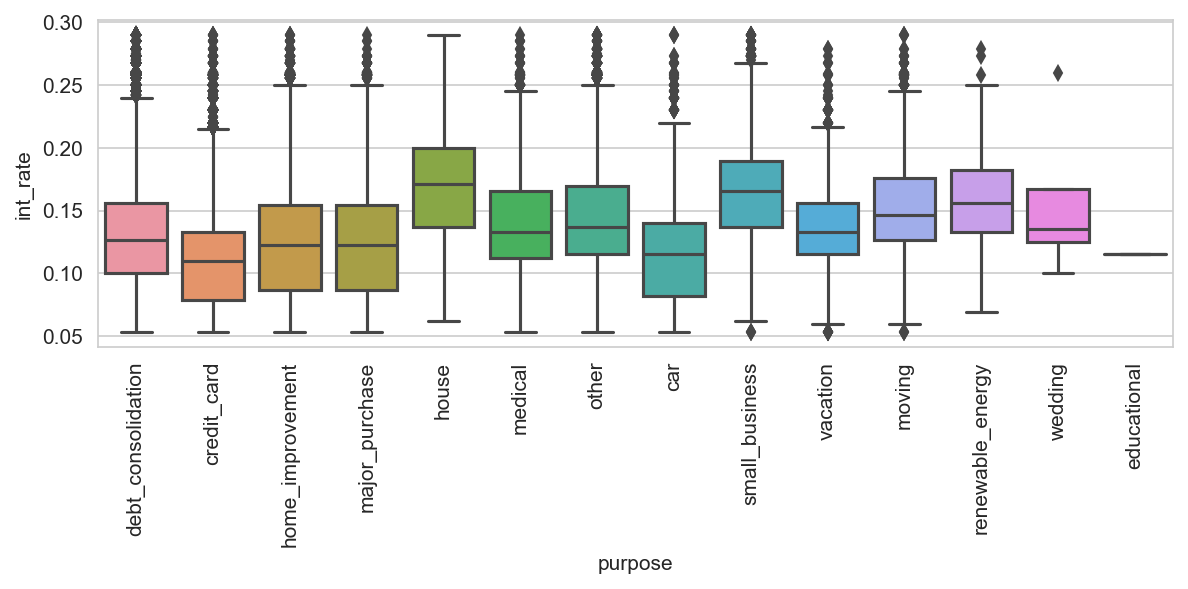

In [17]:
plt.figure(figsize=(8,4), dpi=150)
f = sns.boxplot(x='purpose', y='int_rate', data=reduced_dataset)
plt.xticks(rotation=90)
plt.tight_layout(pad=1)
plt.savefig("./graphics/interest_rate_and_purpose.png")
plt.show()

__Analyse__:
- Kredite für Häuser, kleinere Unternehmungen und Investitionen für Erneuerbaren Energien haben durchschnittlich höhere Interest Rates

## Interest Rate and Term

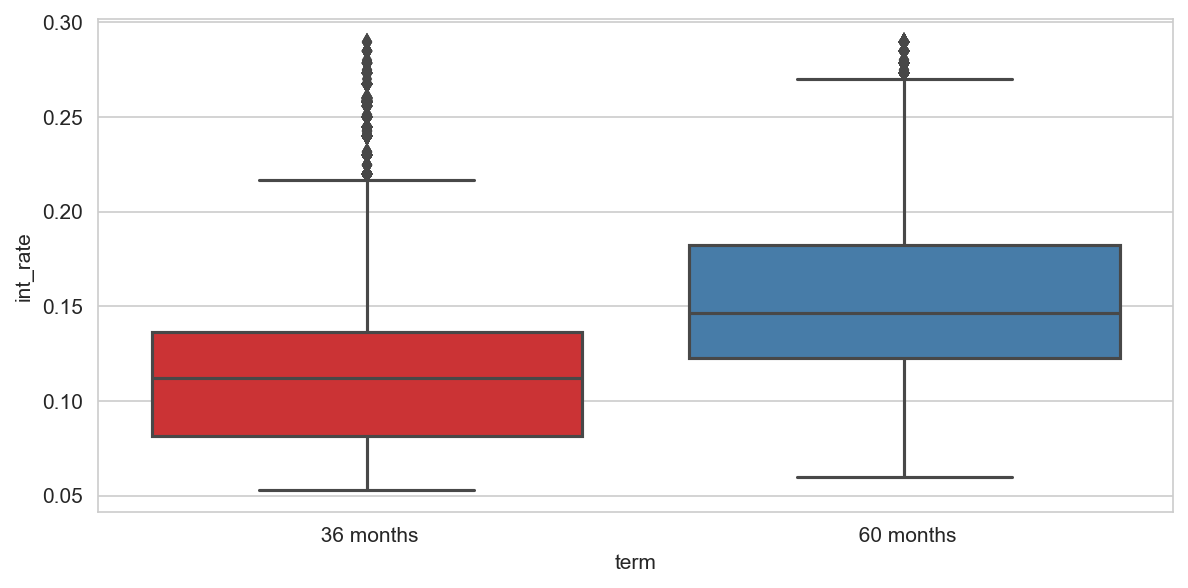

In [18]:
plt.figure(figsize=(8,4), dpi=150)
sns.boxplot(x='term', y='int_rate', data=reduced_dataset)
plt.tight_layout(pad=1)
plt.savefig("./graphics/interest_rate_and_term.png")
plt.show()

__Analyse__:
- Kredite mit einer längeren Laufzeit haben durchschnittlich eine höhere Interest Rate. 

## Loan Status by Grade

In [108]:
cm = sns.light_palette("red", as_cmap=True)
round(pd.crosstab(reduced_dataset['loan_status'], reduced_dataset['grade'], normalize='columns')*100,2).style.background_gradient(cmap = cm)

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,3.38,7.38,12.88,19.16,24,32.29,37.38
Current,56.23,54.41,49.92,44.9,41.2,33.77,26.17
Default,0.01,0.01,0.02,0.02,0.03,0.01,0
Fully Paid,39.01,35.41,33.23,30.86,28.79,27.89,30.18
In Grace Period,0.6,1.08,1.57,1.9,2,1.93,1.66
Late (16-30 days),0.13,0.32,0.43,0.56,0.64,0.65,0.65
Late (31-120 days),0.64,1.38,1.95,2.6,3.33,3.46,3.97


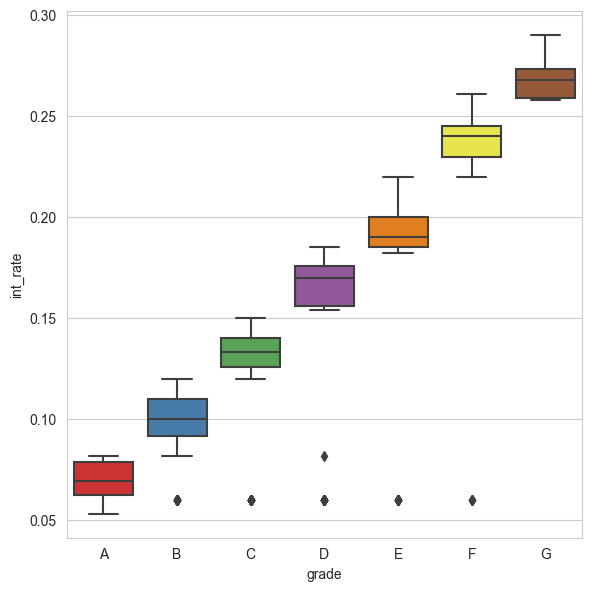

In [19]:
plt.figure(figsize=(6,6), dpi=100)
sns.boxplot(x='grade', y='int_rate', data=reduced_dataset, order = 'ABCDEFG')
plt.tight_layout(pad=1)
plt.savefig("./graphics/int_rate_and_grade.png")
plt.show()

__Analyse__: 
- Die von Lending Club vergebenen Bewertungen sind logisch. Niedriger eingestufte Darlehen werden erwartungsgemäß weniger wahrscheinlich bezahlt und haben höhere Interest Rates.
- Es gitbt ein paar Ausreißer, welche man näher betrachten müsste 

## Loan Amount by Grade

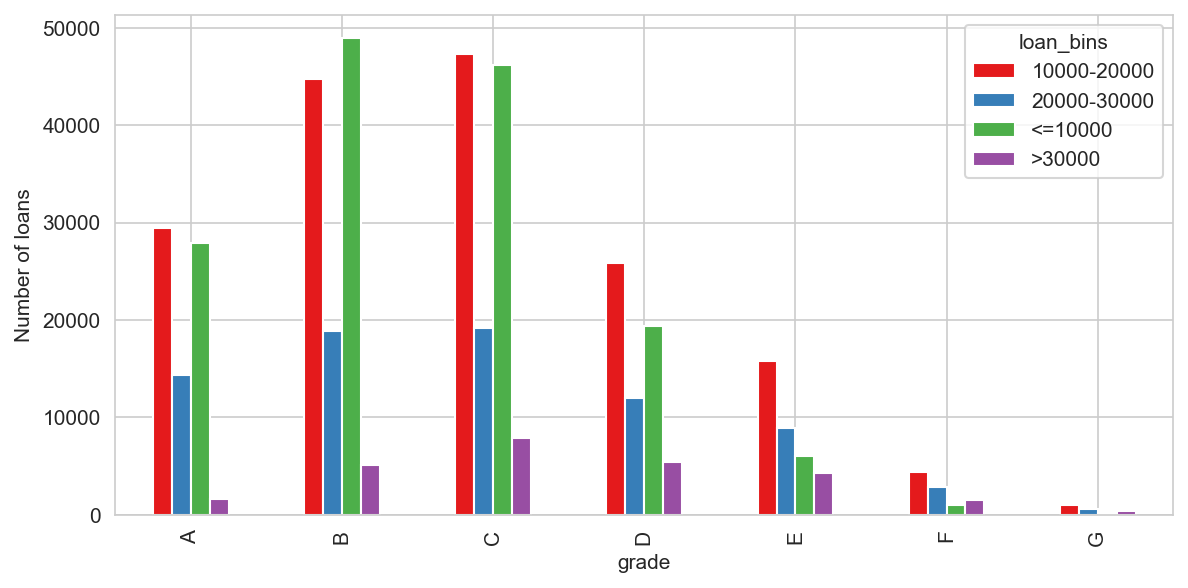

In [20]:
plt.figure(figsize=(8,4), dpi=150)
def loan_binning(num):
    if num <= 10000:
        return '<=10000'
    elif num <= 20000:
        return '10000-20000'
    elif num <= 30000:
        return '20000-30000'
    else:
        return '>30000'
reduced_dataset['loan_bins'] = reduced_dataset['loan_amnt'].apply(loan_binning)
reduced_dataset.groupby(['grade','loan_bins']).size().unstack().plot(kind="bar", ax = plt.gca())
plt.ylabel("Number of loans")
plt.tight_layout(pad=1)
plt.savefig("./graphics/amount_of_loans_bins.png")

__Analyse__:
- 

## Term by Grade

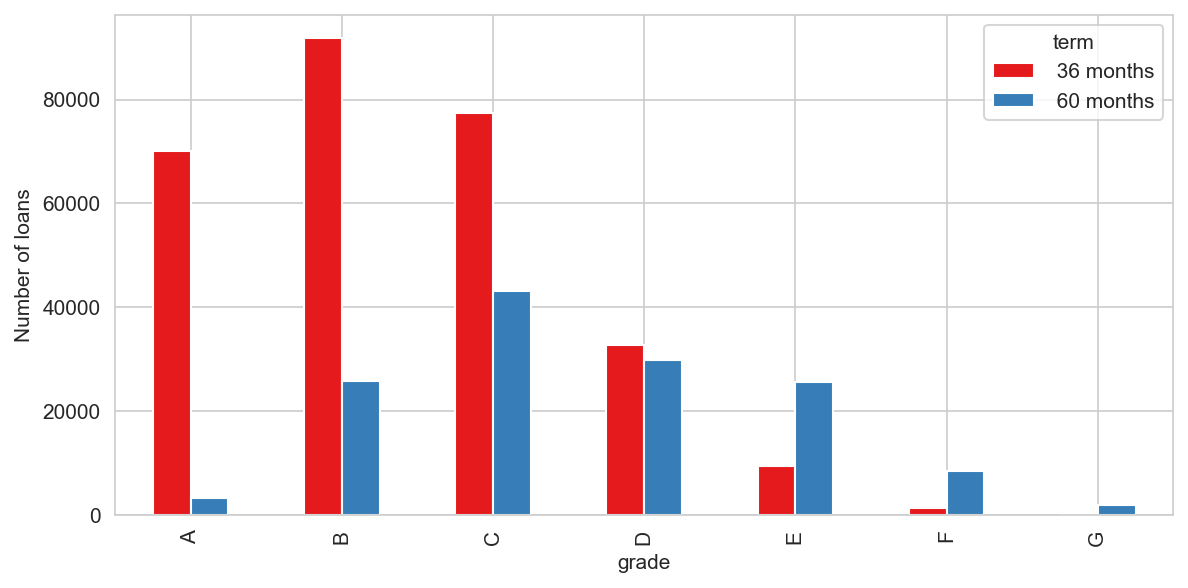

In [21]:
plt.figure(figsize=(8,4), dpi=150)
term_by_grade = reduced_dataset.groupby(['grade','term']).size().unstack().plot(kind="bar", ax = plt.gca())
plt.ylabel("Number of loans")
plt.tight_layout(pad=1)
plt.savefig("./graphics/grade_and_terms.png")

__Analyse__:
- Kredite mit schlechteren Bewertungen haben in der Regel eine längere Laufzeit. 